In [ ]:
#KNN

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

plt.rcParams['font.family'] = 'NanumGothic'

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 데이터 파일 경로
file_path1 = '/content/drive/MyDrive/소비심리지수.csv'
file_path2 = '/content/drive/MyDrive/매매가격지수.csv'

# 데이터 불러오기
data1 = pd.read_csv(file_path1, encoding='EUC-KR')
data1 = data1.iloc[:, 1:]  # 필요한 열 범위 선택

data2 = pd.read_csv(file_path2, encoding='EUC-KR')
data2 = data2.iloc[:, 1:]  # 필요한 열 범위 선택

print(data1.head())
print(data2.head())

# 날짜 형식으로 변환
for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data1.columns = pd.to_datetime(data1.columns, format='%Y.%m')

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data2.columns = pd.to_datetime(data2.columns, format='%Y.%m')

# 다중 회귀 분석을 통한 선행성 확인
X = data1.iloc[:, 2:-1]  # 독립 변수로 소비심리지수 사용. 마지막 열 제외
y = data2.iloc[:, -1]  # 종속 변수로 매매가격지수 사용. 마지막 열 사용

# '-'를 NaN으로 대체
X = X.replace('-', np.nan)
y = y.replace('-', np.nan)

# NaN을 가지는 행 제거
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# KNN 모델 피팅 및 예측
model = KNeighborsRegressor(n_neighbors=5)  # 이웃 개수 설정
model.fit(X, y)
y_pred = model.predict(X)

# 성능 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE: ", mse)
print("R-squared: ", r2)

# 실제 값과 예측 값 비교를 위한 데이터프레임 생성
results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# 실제 값과 예측 값 시각화
plt.plot(results.index, results['Actual'], label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.xlabel('날짜')
plt.ylabel('매매가격지수')
plt.title('매매가격지수 예측 결과')
plt.legend()
plt.show()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,123 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and di

FileNotFoundError: ignored

Mean MSE:  39.43133333333337
Mean R-squared:  -16.87863400421962


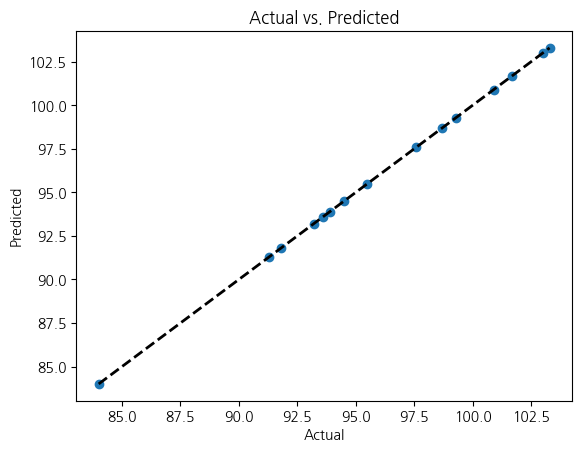

In [ ]:
#Decision Tree

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 파일 경로
file_path1 = '/content/drive/MyDrive/소비심리지수.csv'
file_path2 = '/content/drive/MyDrive/매매가격지수.csv'

# 데이터 불러오기
data1 = pd.read_csv(file_path1, encoding='EUC-KR')
data1 = data1.iloc[:, 1:]  # 필요한 열 범위 선택

data2 = pd.read_csv(file_path2, encoding='EUC-KR')
data2 = data2.iloc[:, 1:]  # 필요한 열 범위 선택

# 날짜 형식으로 변환
for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data1.columns = pd.to_datetime(data1.columns, format='%Y.%m')

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data2.columns = pd.to_datetime(data2.columns, format='%Y.%m')


# 데이터 전처리
X = data1.iloc[:, 2:-1]  # 독립 변수로 소비심리지수 사용. 마지막 열 제외
y = data2.iloc[:, -1]  # 종속 변수로 매매가격지수 사용. 마지막 열 사용

# '-'를 NaN으로 대체
X = X.replace('-', np.nan)
y = y.replace('-', np.nan)

# NaN을 가지는 행 제거
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# Decision Tree 모델 생성
model = DecisionTreeRegressor()

# 교차 검증 수행
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# 교차 검증 결과 출력
mse_scores = -scores  # neg_mean_squared_error이므로 다시 양수로 변환
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(cross_val_score(model, X, y, cv=5, scoring='r2'))

print("Mean MSE: ", mean_mse)
print("Mean R-squared: ", mean_r2)

# 모델 피팅
model.fit(X, y)

# 실제 값과 예측 값 시각화
y_pred = model.predict(X)

plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

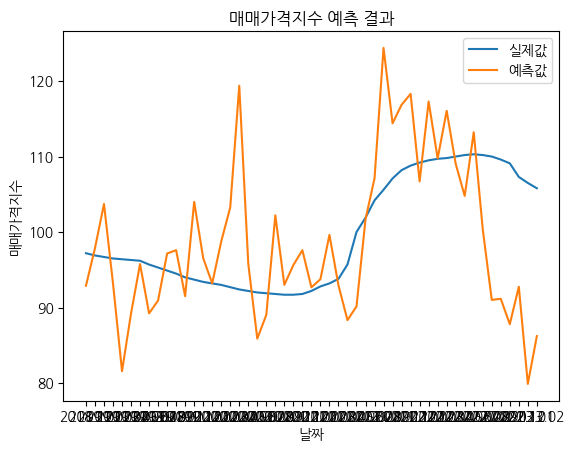

In [ ]:
#Ridge regression
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

plt.rcParams['font.family'] = 'NanumGothic'

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 데이터 파일 경로
file_path1 = '/content/drive/MyDrive/소비심리지수.csv'
file_path2 = '/content/drive/MyDrive/매매가격지수.csv'

# 데이터 불러오기
data1 = pd.read_csv(file_path1, encoding='EUC-KR')
data1 = data1.iloc[:, 1:]  # 필요한 열 범위 선택

data2 = pd.read_csv(file_path2, encoding='EUC-KR')
data2 = data2.iloc[:, 1:]  # 필요한 열 범위 선택


# 월별 변수를 지역별 변수로 변경
data1 = data1.T
data1.columns = data1.iloc[0]
data1 = data1.iloc[1:]

data2 = data2.T
data2.columns = data2.iloc[0]
data2 = data2.iloc[1:]

print(data1.head())
print(data2.head())

# 날짜 형식으로 변환
for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data1.columns = pd.to_datetime(data1.columns, format='%Y.%m')

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data2.columns = pd.to_datetime(data2.columns, format='%Y.%m')

# 다중 회귀 분석을 통한 선행성 확인
X = data1.iloc[:, 2:-1]  # 독립 변수로 소비심리지수 사용. 마지막 열 제외
y = data2.iloc[:, -1]  # 종속 변수로 매매가격지수 사용. 마지막 열 사용

# '-'를 NaN으로 대체
X = X.replace('-', np.nan)
y = y.replace('-', np.nan)

# NaN을 가지는 행 제거
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# 데이터 형 변환
X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

# Ridge Regression 모델 피팅 및 예측
model = sm.OLS(y, X).fit_regularized(alpha=0.5, L1_wt=0)
y_pred = model.predict(X)

# 성능 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE: ", mse)
print("R-squared: ", r2)

# 실제 값과 예측 값 비교를 위한 데이터프레임 생성
results = pd.DataFrame({'실제값': y, '예측값': y_pred})

# 실제 값과 예측 값 시각화
plt.plot(results.index, results['실제값'], label='실제값')
plt.plot(results.index, results['예측값'], label='예측값')
plt.xlabel('날짜')
plt.ylabel('매매가격지수')
plt.title('매매가격지수 예측 결과')
plt.legend()
plt.show()


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


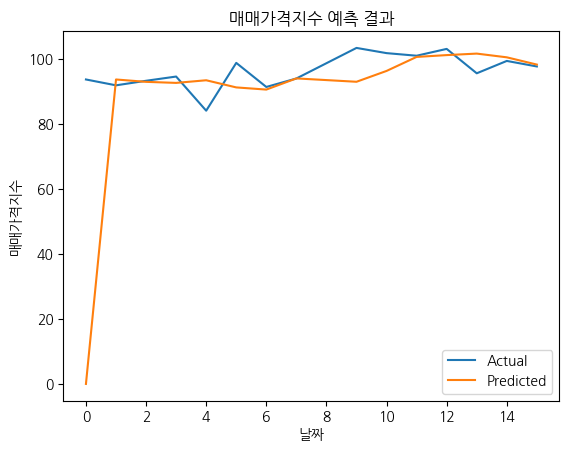

In [ ]:
#시계열분석(ARIMA)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

plt.rcParams['font.family'] = 'NanumGothic'

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 데이터 파일 경로
file_path1 = '/content/drive/MyDrive/소비심리지수.csv'
file_path2 = '/content/drive/MyDrive/매매가격지수.csv'

# 데이터 불러오기
data1 = pd.read_csv(file_path1, encoding='EUC-KR')
data1 = data1.iloc[:, 1:]  # 필요한 열 범위 선택

data2 = pd.read_csv(file_path2, encoding='EUC-KR')
data2 = data2.iloc[:, 1:]  # 필요한 열 범위 선택

print(data1.head())
print(data2.head())

# 날짜 형식으로 변환

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data1.columns = pd.to_datetime(data1.columns, format='%Y.%m')

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data2.columns = pd.to_datetime(data2.columns, format='%Y.%m')


# 다중 회귀 분석을 통한 선행성 확인
X = data1.iloc[:, 2:-1]  # 독립 변수로 소비심리지수 사용. 마지막 열 제외
y = data2.iloc[:, -1]  # 종속 변수로 매매가격지수 사용. 마지막 열 사용

# '-'를 NaN으로 대체
X = X.replace('-', np.nan)
y = y.replace('-', np.nan)

# NaN을 가지는 행 제거
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# ARIMA 모델 피팅 및 예측
model = sm.tsa.ARIMA(y, order=(1, 1, 1))  # ARIMA(p, d, q) 순서 설정
model_fit = model.fit()
y_pred = model_fit.predict()

# 성능 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE: ", mse)
print("R-squared: ", r2)

# 실제 값과 예측 값 비교를 위한 데이터프레임 생성
results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# 실제 값과 예측 값 시각화
plt.plot(results.index, results['Actual'], label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.xlabel('날짜')
plt.ylabel('매매가격지수')
plt.title('매매가격지수 예측 결과')
plt.legend()
plt.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.0185
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 0.0981
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0185
Epoch 4/50
1/1 [==============================] - 0s 48ms/step - loss: 0.0267
Epoch 5/50
1/1 [==============================] - 0s 43ms/step - loss: 0.0509
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0320
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0090
Epoch 8/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0071
Epoch 9/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0179
Epoch 10/50
1/1 [==============================] - 0s 37ms/step - loss: 0.0224
Epoch 11/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0155
Epoch 12/50
1/1 [==========================

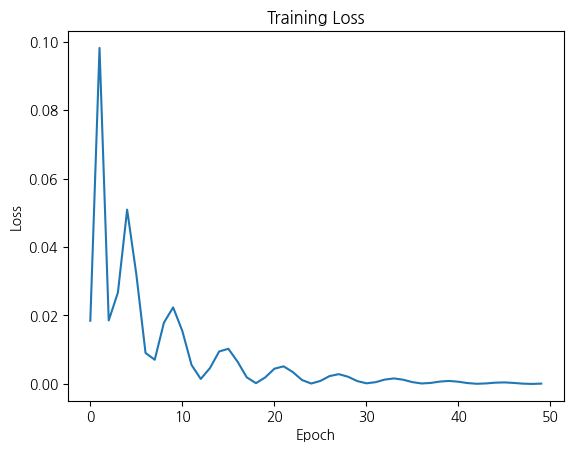

1/1 [==============================] - 2s 2s/step
Predicted next value: [[94.176575]]
1/1 [==============================] - 0s 56ms/step
MSE:  9311.700622324708
R-squared:  -1435906.9247142423


In [ ]:
#RNN
!pip install tensorflow


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 파일 경로
file_path1 = '/content/drive/MyDrive/소비심리지수.csv'
file_path2 = '/content/drive/MyDrive/매매가격지수.csv'

# 데이터 불러오기
data1 = pd.read_csv(file_path1, encoding='EUC-KR')
data1 = data1.iloc[:, 1:]  # 필요한 열 범위 선택

data2 = pd.read_csv(file_path2, encoding='EUC-KR')
data2 = data2.iloc[:, 1:]  # 필요한 열 범위 선택

# 날짜 형식으로 변환

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data1.columns = pd.to_datetime(data1.columns, format='%Y.%m')

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data2.columns = pd.to_datetime(data2.columns, format='%Y.%m')

# 다중 회귀 분석을 통한 선행성 확인
X = data1.iloc[:, 2:-1]  # 독립 변수로 소비심리지수 사용. 마지막 열 제외
y = data2.iloc[:, -1]  # 종속 변수로 매매가격지수 사용. 마지막 열 사용

# '-'를 NaN으로 대체
X = X.replace('-', np.nan)
y = y.replace('-', np.nan)

# NaN을 가지는 행 제거
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# 데이터 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 데이터셋 생성
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i+time_steps)])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 12  # RNN 입력 시퀀스 길이

# 데이터셋 생성
X_train, y_train = create_dataset(X_scaled, y_scaled, time_steps)

# RNN 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(units=1)
])

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError())

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# 훈련 과정 그래프
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# 마지막 시퀀스를 기반으로 다음 시점 예측
last_sequence = X_scaled[-time_steps:]
next_pred = model.predict(last_sequence.reshape(1, time_steps, X_scaled.shape[1]))

# 예측 결과 역정규화
next_pred_rescaled = scaler.inverse_transform(next_pred)

# 예측 결과 출력
print("Predicted next value:", next_pred_rescaled)

# 테스트 데이터셋 생성
X_test, y_test = create_dataset(X_scaled, y_scaled, time_steps)

# 테스트 데이터셋으로 예측
y_pred = model.predict(X_test)

# 예측 결과 역정규화
y_pred_rescaled = scaler.inverse_transform(y_pred)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred_rescaled)
r2 = r2_score(y_test, y_pred_rescaled)

# 결과 출력
print("MSE: ", mse)
print("R-squared: ", r2)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

plt.rcParams['font.family'] = 'NanumGothic'

import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 데이터 파일 경로
file_path1 = '/content/drive/MyDrive/소비심리지수.csv'
file_path2 = '/content/drive/MyDrive/매매가격지수.csv'

# 데이터 불러오기
data1 = pd.read_csv(file_path1, encoding='EUC-KR')
data1 = data1.iloc[:, 1:]  # 필요한 열 범위 선택

data2 = pd.read_csv(file_path2, encoding='EUC-KR')
data2 = data2.iloc[:, 1:]  # 필요한 열 범위 선택

# 월별 변수를 지역별 변수로 변경
data1 = data1.T
data1.columns = data1.iloc[0]
data1 = data1.iloc[1:]

data2 = data2.T
data2.columns = data2.iloc[0]
data2 = data2.iloc[1:]

# 날짜 형식으로 변환
for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data1.columns = pd.to_datetime(data1.columns, format='%Y.%m')

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data2.columns = pd.to_datetime(data2.columns, format='%Y.%m')

# 다중 회귀 분석을 통한 선행성 확인
X = data1.iloc[:, 2:-1]  # 독립 변수로 소비심리지수 사용. 마지막 열 제외
y = data2.iloc[:, -1]  # 종속 변수로 매매가격지수 사용. 마지막 열 사용

# '-'를 NaN으로 대체
X = X.replace('-', np.nan)
y = y.replace('-', np.nan)

# NaN을 가지는 행 제거
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# 데이터 전처리
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 데이터셋 생성
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i+time_steps)])
        ys.append(y[i+time_steps])

    return np.array(Xs), np.array(ys)

time_steps = 12  # RNN 입력 시퀀스 길이

# 데이터셋 생성
X_train, y_train = create_dataset(X_scaled, y_scaled, time_steps)

# RNN 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(units=1)
])

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError())

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# 예측
X_pred = X_scaled[-time_steps:]
X_pred = X_pred.reshape((1, time_steps, X_scaled.shape[1]))
y_pred = model.predict(X_pred)
y_pred = scaler.inverse_transform(y_pred)

# 결과 출력
print("예측값:", y_pred)

# 예측값과 실제값 비교
y_actual = y.iloc[-1]  # 실제값
y_pred = y_pred[0][0]  # 예측값

# MSE 계산
mse = mean_squared_error([y_actual], [y_pred])

# R-squared 계산
r2 = r2_score([y_actual], [y_pred])

print("MSE: ", mse)
print("R-squared: ", r2)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

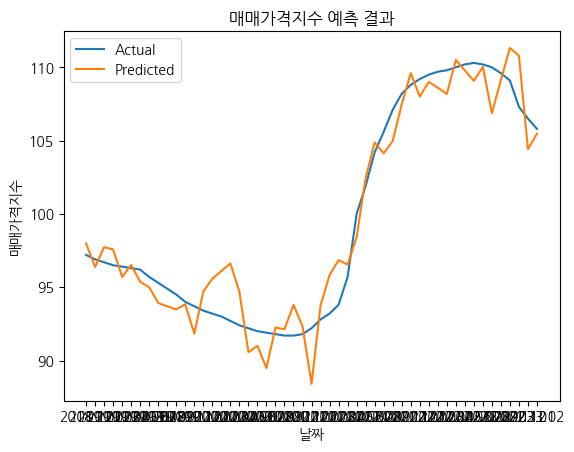

In [ ]:
#다중회귀분석

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

plt.rcParams['font.family'] = 'NanumGothic'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 데이터 파일 경로
file_path1 = '/content/drive/MyDrive/소비심리지수.csv'
file_path2 = '/content/drive/MyDrive/매매가격지수.csv'

# 데이터 불러오기
data1 = pd.read_csv(file_path1, encoding='EUC-KR')
data1 = data1.iloc[:, 1:]  # 필요한 열 범위 선택

data2 = pd.read_csv(file_path2, encoding='EUC-KR')
data2 = data2.iloc[:, 1:]  # 필요한 열 범위 선택


# 월별 변수를 지역별 변수로 변경
data1 = data1.T
data1.columns = data1.iloc[0]
data1 = data1.iloc[1:]

data2 = data2.T
data2.columns = data2.iloc[0]
data2 = data2.iloc[1:]

print(data1.head())
print(data2.head())

# 날짜 형식으로 변환

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data1.columns = pd.to_datetime(data1.columns, format='%Y.%m')

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data2.columns = pd.to_datetime(data2.columns, format='%Y.%m')

# 다중 회귀 분석을 통한 선행성 확인
X = data1.iloc[:, 2:-1]  # 독립 변수로 소비심리지수 사용. 마지막 열 제외
y = data2.iloc[:, -1]  # 종속 변수로 매매가격지수 사용. 마지막 열 사용

# '-'를 NaN으로 대체
X = X.replace('-', np.nan)
y = y.replace('-', np.nan)

# NaN을 가지는 행 제거
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

model = LinearRegression()
model.fit(X, y)

# 모델의 계수 확인
coefficients = pd.DataFrame({'변수': X.columns, '계수': model.coef_})
print(coefficients)

# 성능 평가
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE: ", mse)
print("R-squared: ", r2)

# 실제 값과 예측 값 비교를 위한 데이터프레임 생성
results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# 실제 값과 예측 값 시각화
plt.plot(results.index, results['Actual'], label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.xlabel('날짜')
plt.ylabel('매매가격지수')
plt.title('매매가격지수 예측 결과')
plt.legend()
plt.show()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

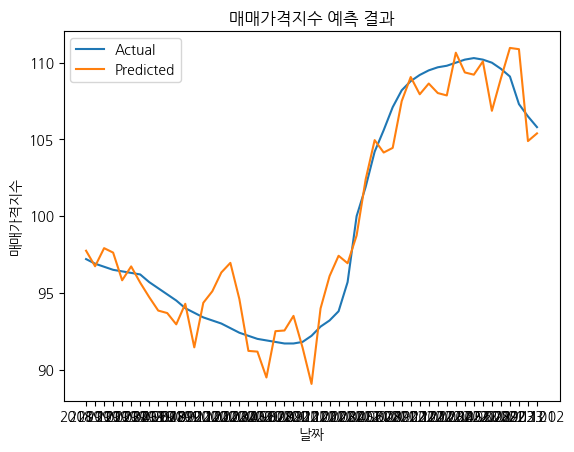

In [ ]:
#Lasso Regression

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

plt.rcParams['font.family'] = 'NanumGothic'

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 데이터 파일 경로
file_path1 = '/content/drive/MyDrive/소비심리지수.csv'
file_path2 = '/content/drive/MyDrive/매매가격지수.csv'

# 데이터 불러오기
data1 = pd.read_csv(file_path1, encoding='EUC-KR')
data1 = data1.iloc[:, 1:]  # 필요한 열 범위 선택

data2 = pd.read_csv(file_path2, encoding='EUC-KR')
data2 = data2.iloc[:, 1:]  # 필요한 열 범위 선택


# 월별 변수를 지역별 변수로 변경
data1 = data1.T
data1.columns = data1.iloc[0]
data1 = data1.iloc[1:]

data2 = data2.T
data2.columns = data2.iloc[0]
data2 = data2.iloc[1:]

print(data1.head())
print(data2.head())

# 날짜 형식으로 변환
for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data1.columns = pd.to_datetime(data1.columns, format='%Y.%m')

for i in range(114):       
    if i != '':         
        continue           # 아래 코드를 실행하지 않고 건너뜀
    data2.columns = pd.to_datetime(data2.columns, format='%Y.%m')

# 다중 회귀 분석을 통한 선행성 확인
X = data1.iloc[:, 2:-1]  # 독립 변수로 소비심리지수 사용. 마지막 열 제외
y = data2.iloc[:, -1]  # 종속 변수로 매매가격지수 사용. 마지막 열 사용

# '-'를 NaN으로 대체
X = X.replace('-', np.nan)
y = y.replace('-', np.nan)

# NaN을 가지는 행 제거
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

model = Lasso(alpha=0.5)
model.fit(X, y)

# 모델의 계수 확인
coefficients = pd.DataFrame({'변수': X.columns, '계수': model.coef_})
print(coefficients)

# 성능 평가
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE: ", mse)
print("R-squared: ", r2)

# 실제 값과 예측 값 비교를 위한 데이터프레임 생성
results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# 실제 값과 예측 값 시각화
plt.plot(results.index, results['Actual'], label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.xlabel('날짜')
plt.ylabel('매매가격지수')
plt.title('매매가격지수 예측 결과')
plt.legend()
plt.show()
